In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Morphological operations for binary images

In [2]:
%pylab inline
import cv2
import skimage.morphology

Populating the interactive namespace from numpy and matplotlib


## Erosion and Dilation

### Create a structuring elements

In [3]:
strel_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
strel_square = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

### Load a binary image

In [4]:
img = cv2.imread('square_circle.png')

### Apply the circular structuring element

In [5]:
img_eroded_circle = cv2.morphologyEx(img, cv2.MORPH_ERODE, strel_circle)
img_dilated_circle = cv2.morphologyEx(img, cv2.MORPH_DILATE, strel_circle)

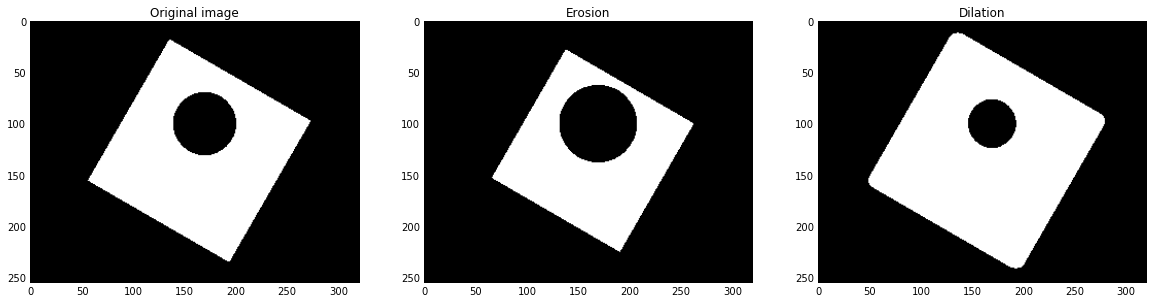

In [6]:
figure(figsize(20,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_eroded_circle), plt.title("Erosion")
plt.subplot(1,3,3), plt.imshow(img_dilated_circle), plt.title("Dilation");

### Apply the square structuring element

In [7]:
img_eroded_square = cv2.morphologyEx(img, cv2.MORPH_ERODE, strel_square)
img_dilated_square = cv2.morphologyEx(img, cv2.MORPH_DILATE, strel_square)

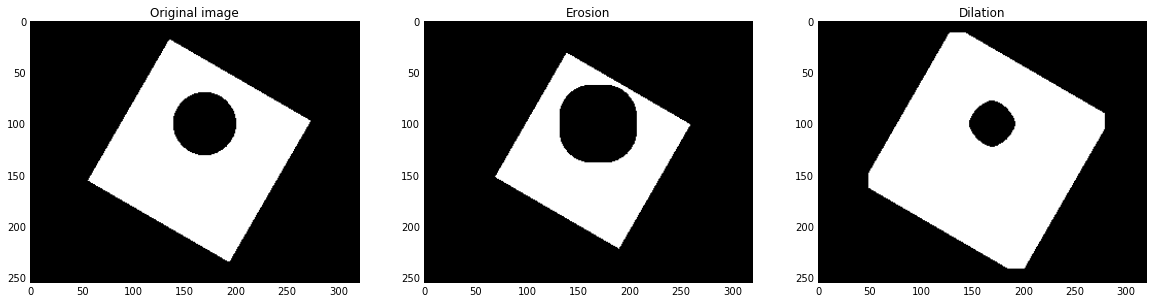

In [8]:
figure(figsize(20,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_eroded_square), plt.title("Erosion")
plt.subplot(1,3,3), plt.imshow(img_dilated_square), plt.title("Dilation");

## Opening and Closing

### Example: removing vertical and diagonal lines, keeping horizontal lines

In [9]:
img = cv2.imread('lines.png')
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 5)) # width: 11, height: 5
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, strel)

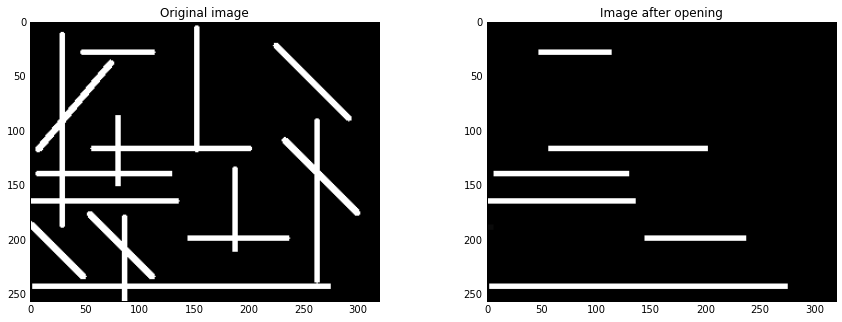

In [10]:
figure(figsize(15,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,2,2), plt.imshow(opened), plt.title("Image after opening");

### Example: removing lines, keeping circles

In [11]:
img = cv2.imread('circles_lines.png')
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, strel)

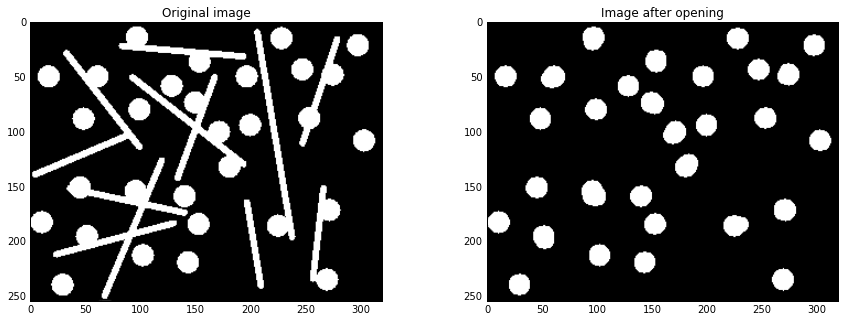

In [12]:
figure(figsize(15,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,2,2), plt.imshow(opened), plt.title("Image after opening");

### Example: removing only small disks

In [13]:
img = cv2.imread('disk.png')
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, strel)

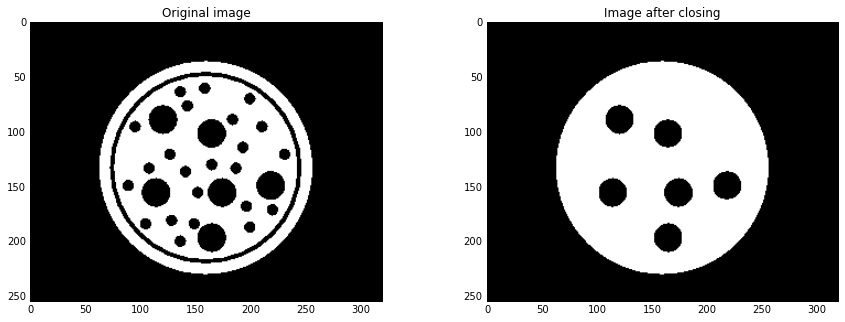

In [14]:
figure(figsize(15,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,2,2), plt.imshow(closed), plt.title("Image after closing");

### Another example

#### Load  grayscale image and convert it to binary

In [15]:
img = cv2.imread('horse.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
print("image: {1}px x {0}px".format(height, width))
theta = 80
theta, bwimg = cv2.threshold(img, theta, 255, cv2.THRESH_BINARY_INV)
# theta, bwimg = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

image: 500px x 669px


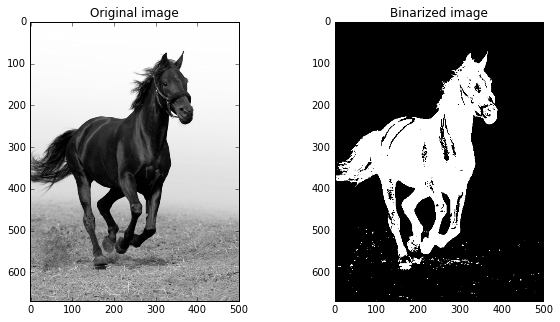

In [16]:
figure(figsize(10,5))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray'), plt.title("Original image")
plt.subplot(1, 2, 2), plt.imshow(bwimg, 'gray'), plt.title("Binarized image");

#### Create structuring elements

In [17]:
strel_small = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
strel_large = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 14))

#### Opening and closing operations

In [18]:
openedimg = cv2.morphologyEx(bwimg, cv2.MORPH_OPEN, strel_small)
closedimg1 = cv2.morphologyEx(openedimg, cv2.MORPH_CLOSE, strel_small)
closedimg2 = cv2.morphologyEx(openedimg, cv2.MORPH_CLOSE, strel_large)

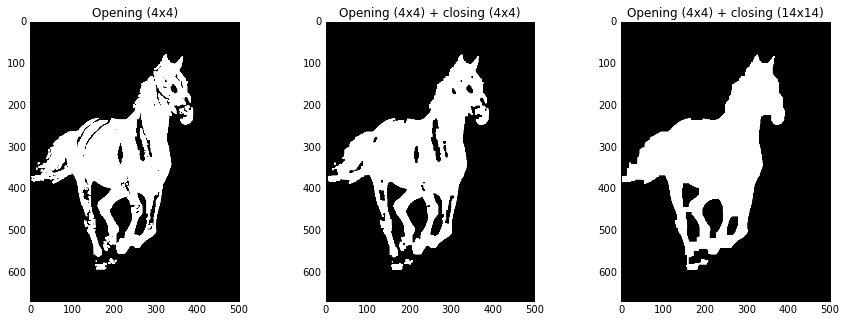

In [19]:
figure(figsize(15,5))
plt.subplot(1, 3, 1), plt.imshow(openedimg, 'gray')
plt.title('Opening (4x4)')
plt.subplot(1, 3, 2), plt.imshow(closedimg1, 'gray')
plt.title('Opening (4x4) + closing (4x4)')
plt.subplot(1, 3, 3), plt.imshow(closedimg2, 'gray')
plt.title('Opening (4x4) + closing (14x14)');

## Skeleton operation

### Example 1

In [20]:
skeleton1 = skimage.morphology.skeletonize(openedimg > 0)
skeleton2 = skimage.morphology.skeletonize(closedimg1 > 0)
skeleton3 = skimage.morphology.skeletonize(closedimg2 > 0)

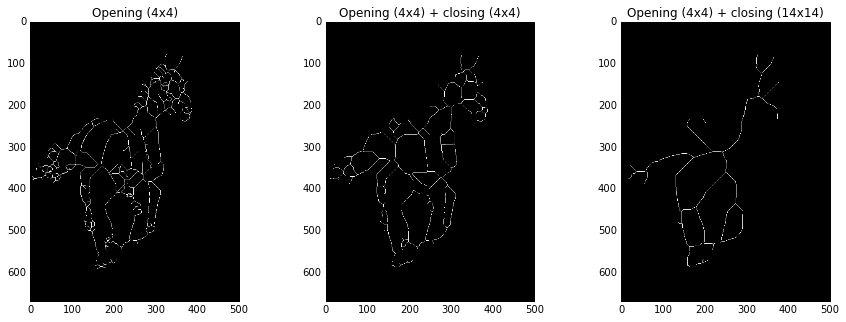

In [21]:
figure(figsize(15,5))
plt.subplot(1, 3, 1), plt.imshow(skeleton1, 'gray')
plt.title('Opening (4x4)')
plt.subplot(1, 3, 2), plt.imshow(skeleton2, 'gray')
plt.title('Opening (4x4) + closing (4x4)')
plt.subplot(1, 3, 3), plt.imshow(skeleton3, 'gray')
plt.title('Opening (4x4) + closing (14x14)');

### Example 2

In [22]:
img = cv2.imread('letter.png', cv2.IMREAD_GRAYSCALE)
skeleton = skimage.morphology.skeletonize(img == 0)

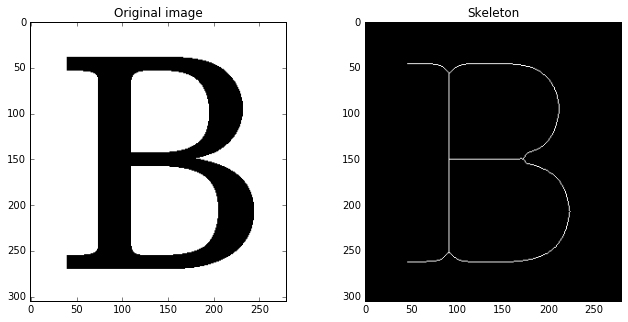

In [23]:
figure(figsize(11,5))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray'), plt.title('Original image')
plt.subplot(1, 2, 2), plt.imshow(skeleton, 'gray'), plt.title('Skeleton');

### Example 3

In [24]:
img = cv2.imread('phone.jpg', cv2.IMREAD_GRAYSCALE)
theta, img_binarized = cv2.threshold(img, 235, 255, cv2.THRESH_BINARY_INV)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
img_closed = cv2.morphologyEx(img_binarized, cv2.MORPH_CLOSE, strel)
skeleton = skimage.morphology.skeletonize(img_closed > 0)

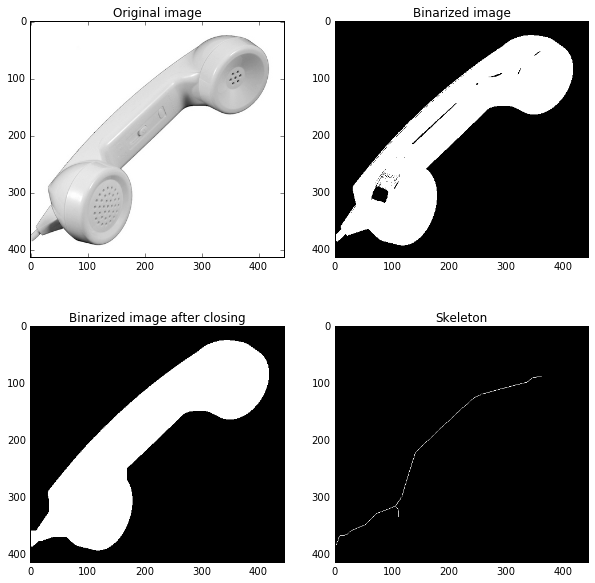

In [25]:
figure(figsize(10,10))
plt.subplot(2, 2, 1), plt.imshow(img, 'gray'), plt.title('Original image')
plt.subplot(2, 2, 2), plt.imshow(img_binarized, 'gray'), plt.title('Binarized image')
plt.subplot(2, 2, 3), plt.imshow(img_closed, 'gray'), plt.title('Binarized image after closing')
plt.subplot(2, 2, 4), plt.imshow(skeleton, 'gray'), plt.title('Skeleton');

## Medial axis transform

In [26]:
medial_axis1 = skimage.morphology.medial_axis(openedimg > 0)
medial_axis2 = skimage.morphology.medial_axis(closedimg1 > 0)
medial_axis3 = skimage.morphology.medial_axis(closedimg2 > 0)

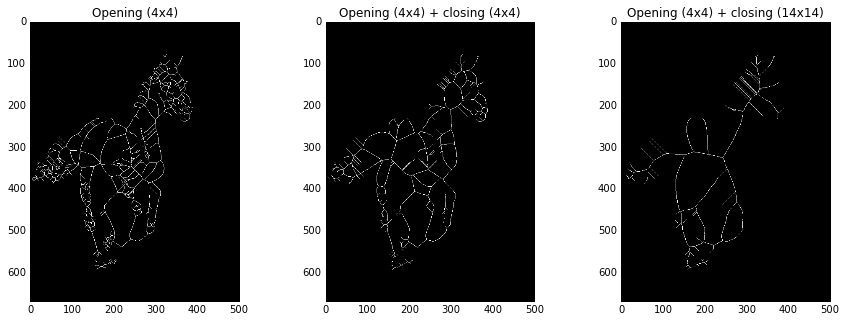

In [27]:
figure(figsize(15,5))
plt.subplot(1, 3, 1), plt.imshow(medial_axis1, 'gray')
plt.title('Opening (4x4)')
plt.subplot(1, 3, 2), plt.imshow(medial_axis2, 'gray')
plt.title('Opening (4x4) + closing (4x4)')
plt.subplot(1, 3, 3), plt.imshow(medial_axis3, 'gray')
plt.title('Opening (4x4) + closing (14x14)');

# Morphological operations for grayscale images

## Erosion

In [28]:
img = cv2.imread('light_bulb.png')
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img_eroded1 = cv2.morphologyEx(img, cv2.MORPH_ERODE, strel)
img_eroded2 = cv2.morphologyEx(img_eroded1, cv2.MORPH_ERODE, strel)

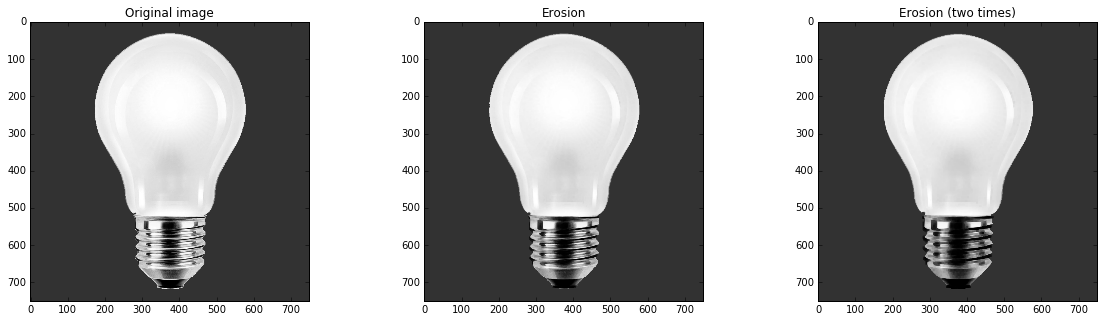

In [29]:
figure(figsize(20,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_eroded1), plt.title("Erosion")
plt.subplot(1,3,3), plt.imshow(img_eroded2), plt.title("Erosion (two times)");

## Dilation

In [30]:
img_dilated1 = cv2.morphologyEx(img, cv2.MORPH_DILATE, strel)
img_dilated2 = cv2.morphologyEx(img_dilated1, cv2.MORPH_DILATE, strel)

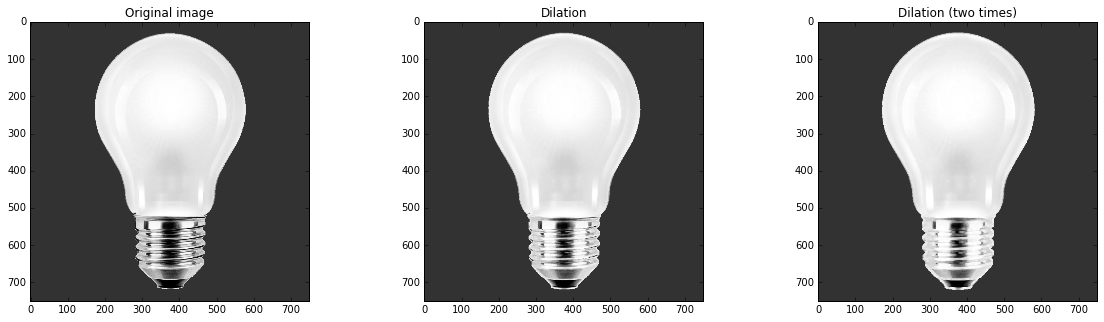

In [31]:
figure(figsize(20,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_dilated1), plt.title("Dilation")
plt.subplot(1,3,3), plt.imshow(img_dilated2), plt.title("Dilation (two times)");

## Opening and Closing

In [32]:
img = cv2.imread('orang-utan.jpg')
img_opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, strel)
img_closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, strel)

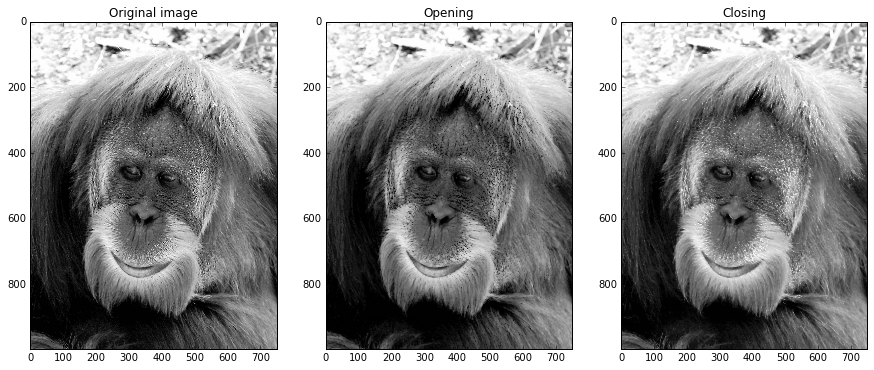

In [33]:
figure(figsize(15,7))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_opened), plt.title("Opening")
plt.subplot(1,3,3), plt.imshow(img_closed), plt.title("Closing");

## Morphological operations and salt noise

### Erosion

In [34]:
img = cv2.imread('taiwan_bicycle.jpg', cv2.IMREAD_GRAYSCALE)
img_salt = skimage.util.random_noise(img, mode='salt', amount=0.05)
img_salt_eroded = cv2.morphologyEx(img_salt, cv2.MORPH_ERODE, strel)

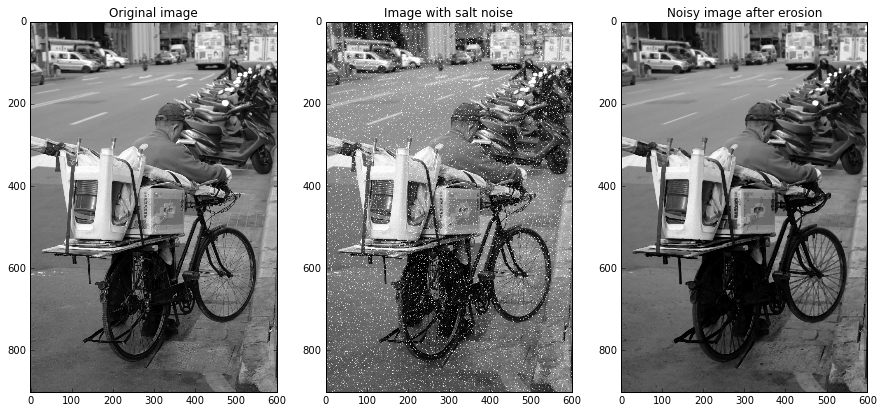

In [35]:
figure(figsize(15,7))
plt.subplot(1,3,1), plt.imshow(img, 'gray'), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_salt, 'gray'), plt.title("Image with salt noise")
plt.subplot(1,3,3), plt.imshow(img_salt_eroded, 'gray'), plt.title("Noisy image after erosion");

### Opening and Closing

In [36]:
img_salt_opened = cv2.morphologyEx(img_salt, cv2.MORPH_OPEN, strel)
img_salt_closed = cv2.morphologyEx(img_salt, cv2.MORPH_CLOSE, strel)

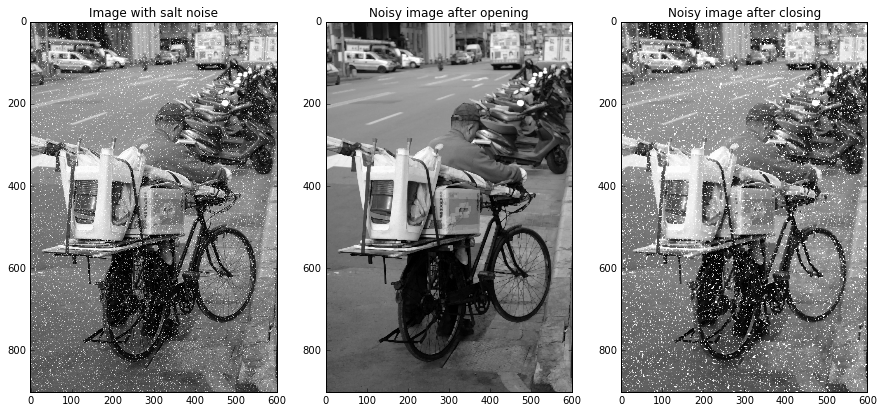

In [37]:
figure(figsize(15,7))
plt.subplot(1,3,1), plt.imshow(img_salt, 'gray'), plt.title("Image with salt noise")
plt.subplot(1,3,2), plt.imshow(img_salt_opened, 'gray'), plt.title("Noisy image after opening")
plt.subplot(1,3,3), plt.imshow(img_salt_closed, 'gray'), plt.title("Noisy image after closing");

## Morphological operations and pepper noise

### Dilation

In [38]:
img_pepper = skimage.util.random_noise(img, mode='pepper', amount=0.05)
img_pepper_dilated = cv2.morphologyEx(img_pepper, cv2.MORPH_DILATE, strel)

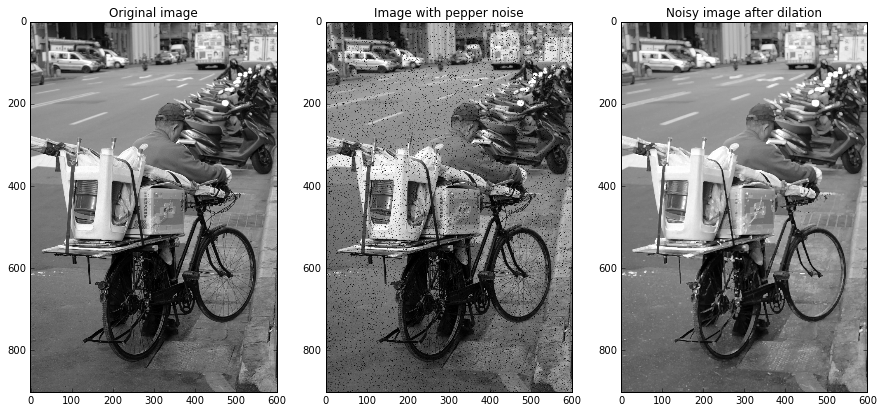

In [39]:
figure(figsize(15,7))
plt.subplot(1,3,1), plt.imshow(img, 'gray'), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_pepper, 'gray'), plt.title("Image with pepper noise")
plt.subplot(1,3,3), plt.imshow(img_pepper_dilated, 'gray'), plt.title("Noisy image after dilation");

### Opening and Closing

In [40]:
img_pepper_opened = cv2.morphologyEx(img_pepper, cv2.MORPH_OPEN, strel)
img_pepper_closed = cv2.morphologyEx(img_pepper, cv2.MORPH_CLOSE, strel)

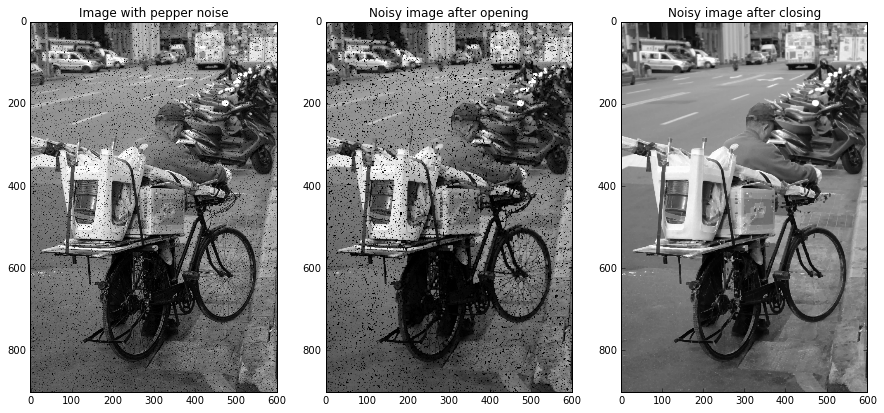

In [41]:
figure(figsize(15,7))
plt.subplot(1,3,1), plt.imshow(img_pepper, 'gray'), plt.title("Image with pepper noise")
plt.subplot(1,3,2), plt.imshow(img_pepper_opened, 'gray'), plt.title("Noisy image after opening")
plt.subplot(1,3,3), plt.imshow(img_pepper_closed, 'gray'), plt.title("Noisy image after closing");

## Morphological operations and salt & pepper noise

### Opening + Closing

In [42]:
img_salt_pepper = skimage.util.random_noise(img, mode='s&p', amount=0.05)

In [43]:
strel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
strel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
img_salt_pepper_opened = cv2.morphologyEx(img_salt_pepper, cv2.MORPH_OPEN, strel1)
img_salt_pepper_opened_closed = cv2.morphologyEx(img_salt_pepper_opened, cv2.MORPH_CLOSE, strel2)

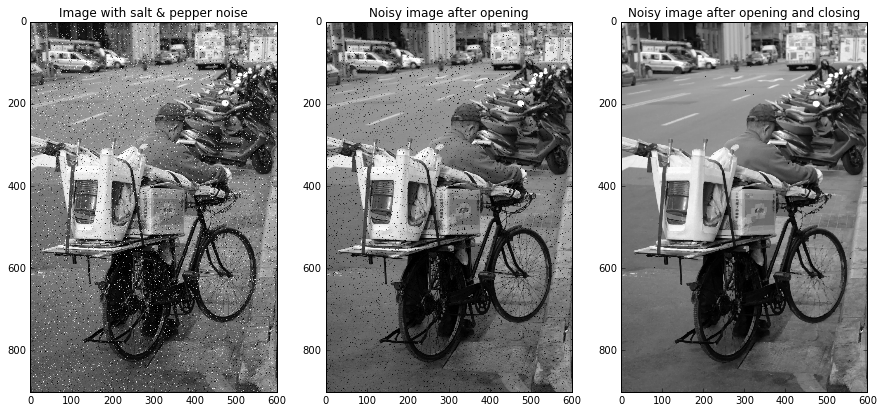

In [44]:
figure(figsize(15,7))
plt.subplot(1,3,1), plt.imshow(img_salt_pepper, 'gray')
plt.title("Image with salt & pepper noise")
plt.subplot(1,3,2), plt.imshow(img_salt_pepper_opened, 'gray')
plt.title("Noisy image after opening")
plt.subplot(1,3,3), plt.imshow(img_salt_pepper_opened_closed, 'gray')
plt.title("Noisy image after opening and closing");